DBSCAN--> Density based spatial clustering of applications with noise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [6]:
from sklearn.datasets import make_blobs

In [10]:
X,etiquetas=make_blobs(n_samples=5000, centers=[(24,30),(52,35),(36,50)],cluster_std=5,random_state=42)

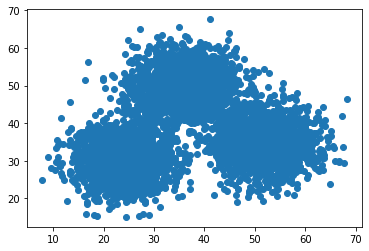

In [11]:
plt.scatter(X[:,0],X[:,1])

In [31]:
kmedias=KMeans(n_clusters=4)
etiquetas_pred=kmedias.fit_predict(X)

In [32]:
etiquetas_pred

array([1, 3, 2, ..., 2, 2, 2])

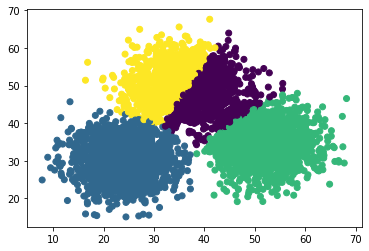

In [33]:
plt.scatter(X[:,0],X[:,1],c=etiquetas_pred)

In [34]:
pd.crosstab(etiquetas_pred,etiquetas)

col_0,0,1,2
row_0,,,
0,6,89,709
1,1641,0,6
2,0,1578,3
3,20,0,948


### Indice de Jacard

$\cfrac{\#(A \cap B)}{\#(A \cup B)}$

In [35]:
def jacard(A,B):
    interseccion=[]
    for i in A:
        if i in B:
            interseccion.append(i)
    
    return len(interseccion)/(len(A)+len(B)-len(interseccion))


$P(A \cup B) = P(A)+ P(B) - P(A \cap B)$

In [36]:
jacard(X[etiquetas==0],X[etiquetas_pred==0])

0.002434077079107505

In [37]:
jacard(X[etiquetas==0],X[etiquetas_pred==1])

0.9808726838015541

In [38]:
jacard(X[etiquetas==0],X[etiquetas_pred==2])

0.0

In [39]:
from itertools import product

In [40]:
list(product([1,2],[3,4]))

[(1, 3), (1, 4), (2, 3), (2, 4)]

In [41]:
np.unique(etiquetas)

array([0, 1, 2])

In [46]:
def emparejamientos_funcion(X,etiquetas,etiquetas_pred):
    emparejamientos={}
    for cluster_real in np.unique(etiquetas_pred):
        valor=0
        for cluster_pred in np.unique(etiquetas):
            valor_jacard=jacard(X[etiquetas==cluster_real],X[etiquetas_pred==cluster_pred])
            if valor_jacard>valor:
                valor=valor_jacard
                emparejamientos[cluster_real]=cluster_pred

    return emparejamientos

In [47]:
emparejamientos_funcion(X,etiquetas,etiquetas_pred)

{0: 1, 1: 2, 2: 0}